# Import Data and Libraries

In [ ]:
from google.colab import files

train = files.upload()
test = files.upload()

Saving train.csv to train.csv


Saving test.csv to test.csv


In [ ]:
## Import libraries and packages

### Data Manipulation
import pandas as pd
import numpy as np

### Plotting
import matplotlib.pyplot as plt
plt.style.use('dark_background')
import plotly.express as px
import seaborn as sns

### Modeling
import sklearn as sk
import tensorflow as tf

## Import data and list out columns
train = pd.read_csv('train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Data Cleansing

In [ ]:
## Check missing values
train.isna().sum(), train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


(PassengerId      0
 Survived         0
 Pclass           0
 Name             0
 Sex              0
 Age            177
 SibSp            0
 Parch            0
 Ticket           0
 Fare             0
 Cabin          687
 Embarked         2
 dtype: int64, None)

In [ ]:
## Let's make the passenger IDs the index of the data
train.index = train['PassengerId']

## Drop the Cabin column because there are so many missing values
train = train.drop(columns=['Cabin'])

In [ ]:
## Impute missing age values with the median
train['Age'].fillna(train['Age'].median(), inplace=True)

## Impute missing embarked values with the mode
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)

# Data Exploration

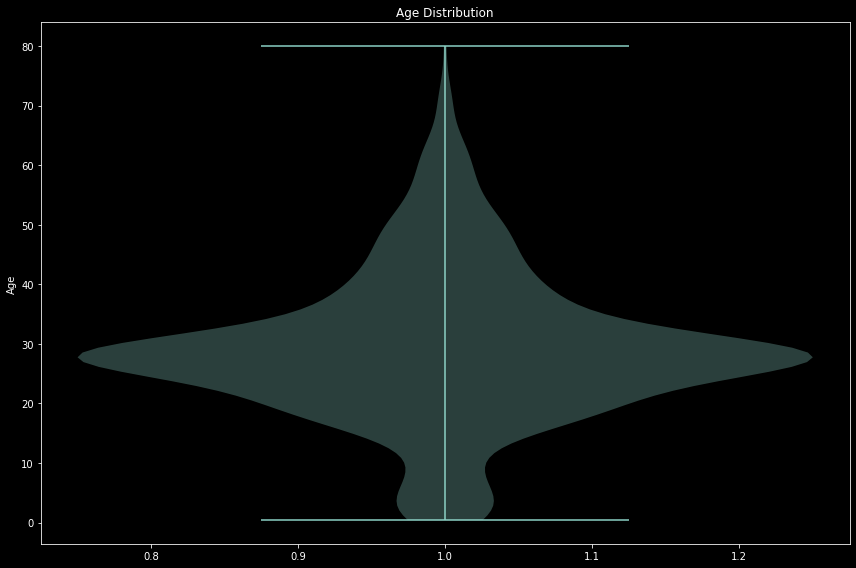

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.violinplot(train['Age'])
plt.title('Age Distribution')
plt.ylabel('Age')
plt.tight_layout()

The majority of passengers were between their 20s and 30s, mostly centered around the late 20s. Let's check if age seemed to have anything to do with survival rate. Also, let's check the class distribution of the passengers.

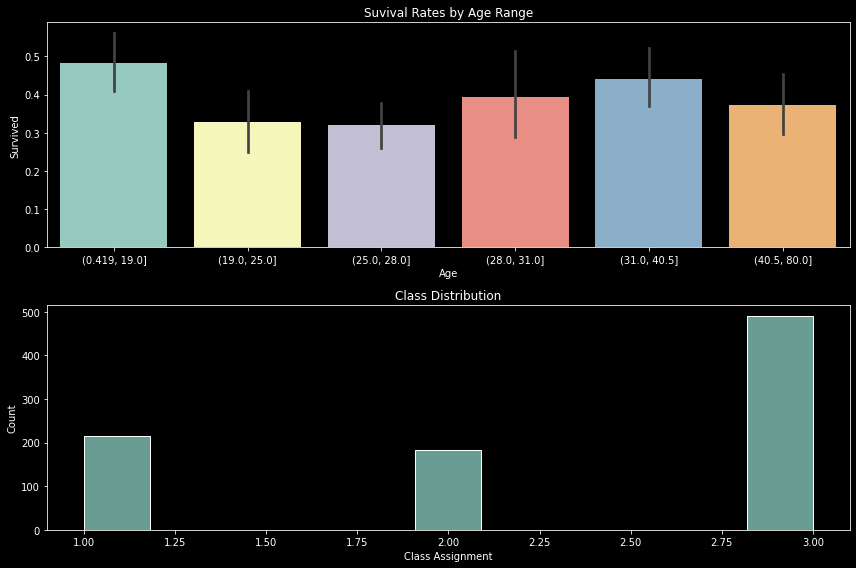

In [ ]:
## Bin the ages
train['binned_age'] = pd.qcut(train['Age'], q=6)

## Plot the survival rate of each bin
fig, ax = plt.subplots(2, figsize=(12, 8))
sns.barplot(x='binned_age', y='Survived', ax=ax[0], data=train)
ax[0].set_title('Suvival Rates by Age Range')
ax[0].set_xlabel('Age')
sns.histplot(data=train, x='Pclass', ax=ax[1])
ax[1].set_title('Class Distribution')
ax[1].set_xlabel('Class Assignment')

plt.tight_layout()
plt.show()

Class distribution shows that the large majority of passengers were in 3rd class, the lowest class. The amount of people in 2nd class or 1st class were very similar.

The two age groups with the highest survival rates were:

    1. 0.5-19.0 years
    2. 31.0-40.5 years

The two age groups with the lowest survival rates were:

    1. 19.0-25.0
    2. 25.0-28.0

This potentially reflects the idea that people in the primes of their life were not considered as heavily for evacuation prioritization in comparison to those that were younger, or nearing middle age.

This may warrant looking further into the class distribution per age group. Perhaps younger and middle aged people belonged on average to higher classes, resulting in a higher survival rate!

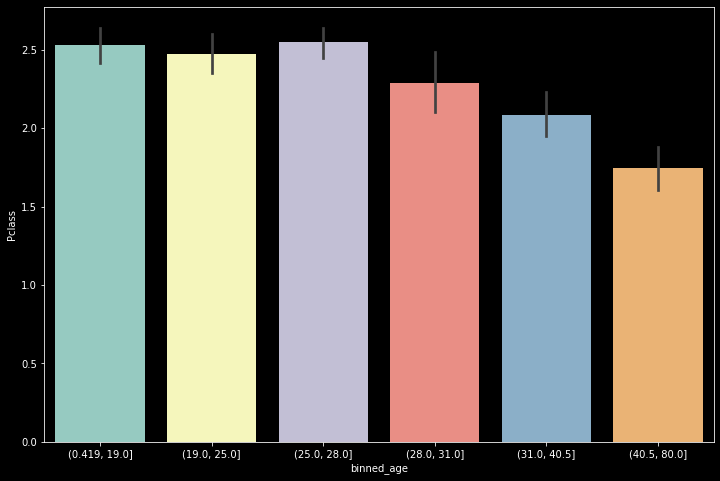

In [ ]:
## Plot the average class assignment of each bin
fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(x='binned_age', y='Pclass', ax=ax, data=train)
plt.show()

As the ages increase, it seems like there is a higher chance for the passenger to be placed in a higher class. The 31.0-40.5 years range had one of the highest survival rates, and also represents the group of passengers with the highest concentration in higher classes amongst its own bin. The youngest age range shoows no real tendency towards higher classes, so maybe they had one of the highest survival rates because saving women and children was a priority.

Let's look at gender.

In [ ]:
train['Sex'].replace({'male':0, 'female':1}, inplace=True)

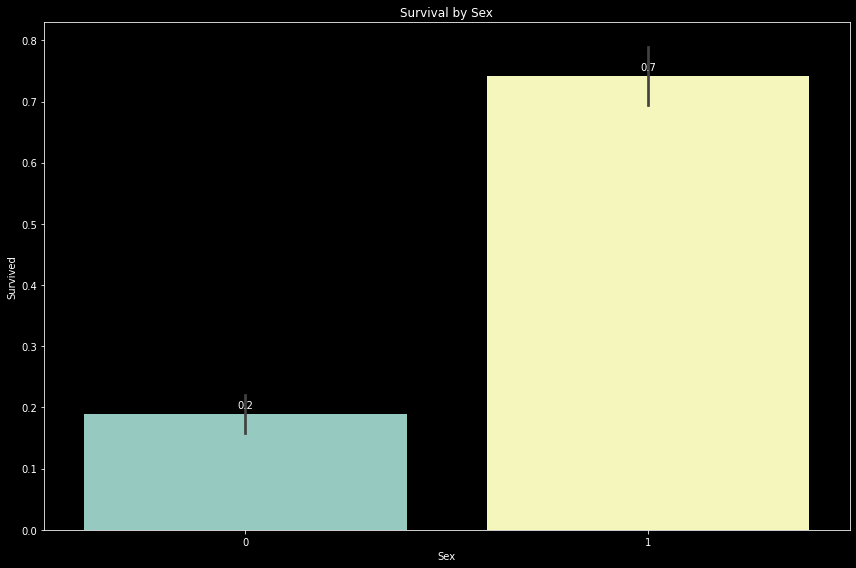

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
g = sns.barplot(x='Sex', y='Survived', data=train, ax=ax)
ax.set_title('Survival by Sex')

for p in g.patches:
    g.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.tight_layout()
plt.show()

If you were a man, your odds of survival were much lower than that of a woman:

    Man: Roughly 20% chance of survival
    Woman: Roughly 70% chance of survival

Now let's look at if having accompanies affected survival rate. The data recorded people who had from 0-5 accompanies with them, and 8 accompanies. 

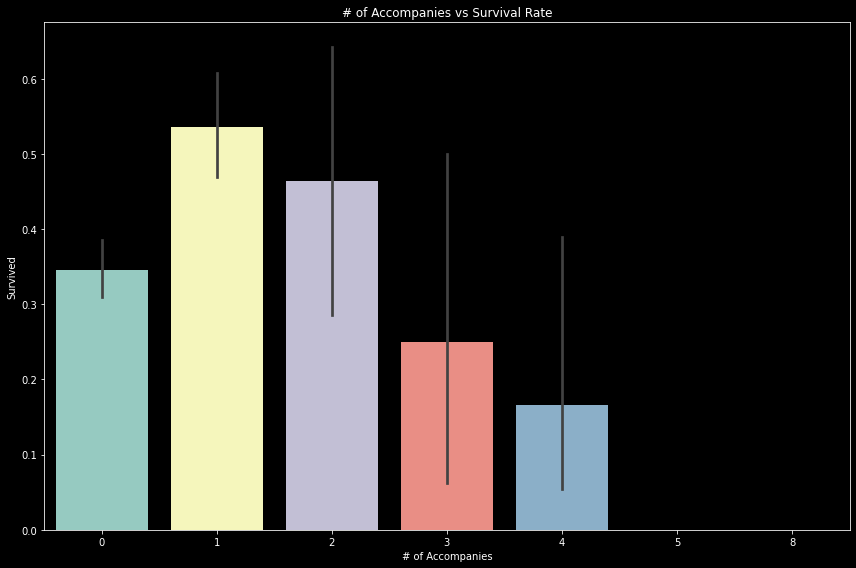

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(x='SibSp', y='Survived', data=train)
ax.set_title('# of Accompanies vs Survival Rate')
ax.set_xlabel('# of Accompanies')
plt.tight_layout()
plt.show()

It seems as if having 1-2 family members/accompanying people resulted in someone having a greater chance of survival. Let's bin the number of family members like this:

    1. 0 family members
    2. 1 family member
    3. 2 family members
    4. 3 or more family members

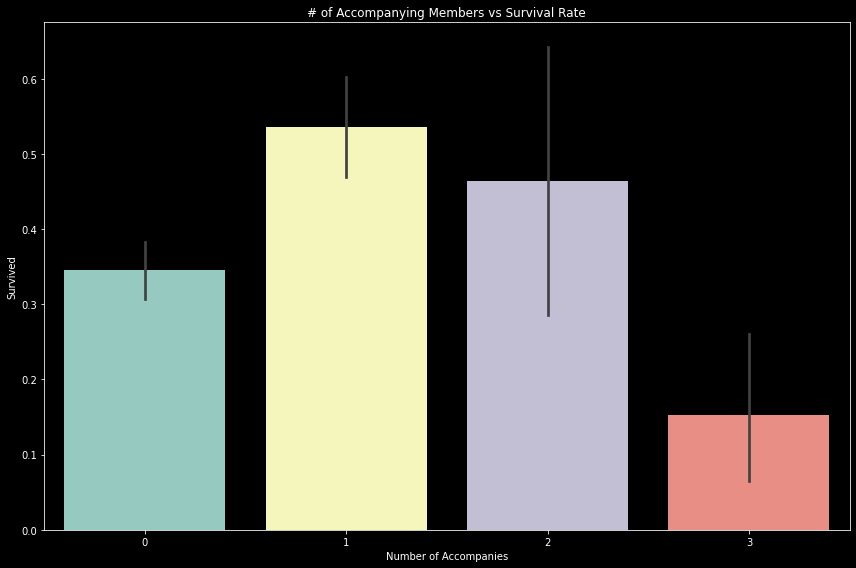

In [ ]:
train['SibSp'].replace({4:3, 5:3, 8:3}, inplace=True)
fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(x='SibSp', y='Survived', data=train)
ax.set_title('# of Accompanying Members vs Survival Rate')
ax.set_xlabel('Number of Accompanies')
plt.tight_layout()
plt.show()

Hopefully organizing the SibSp column like above increases its predictive power for our model.

Now let's bin fare prices and compare them to survival rates to see if they have decent predictive power. First, we have to deal with the crazy outlier in the fare data.

In [ ]:
from scipy import stats
## Copy dataframe
out = train.copy()
## Calculate z-scores and place in dataframe column
out['z'] = np.abs(stats.zscore(train['Fare']))
out = out['z']
## Drop the index values that contain z-scores greater than 3
train.drop(out[out>3].index.values, axis=0, inplace=True)

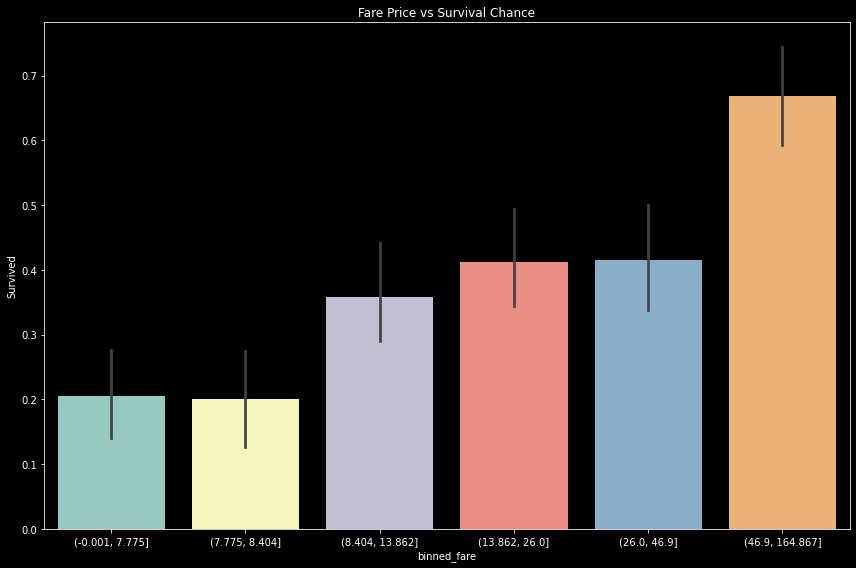

In [ ]:
## Evenly split the data
train['binned_fare'] = pd.qcut(x=train['Fare'], q=6)
## Plot
fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(x=train['binned_fare'], y='Survived', ax=ax, data=train)
ax.set_title('Fare Price vs Survival Chance')
plt.tight_layout()
plt.show()

It seems as if the more money someone payed for a ticket onto the ship, the higher chance of their survival, and by very significant amounts. This must mean that higher class assignment results in higher survival rate, as mentioned before. Let's confirm this.

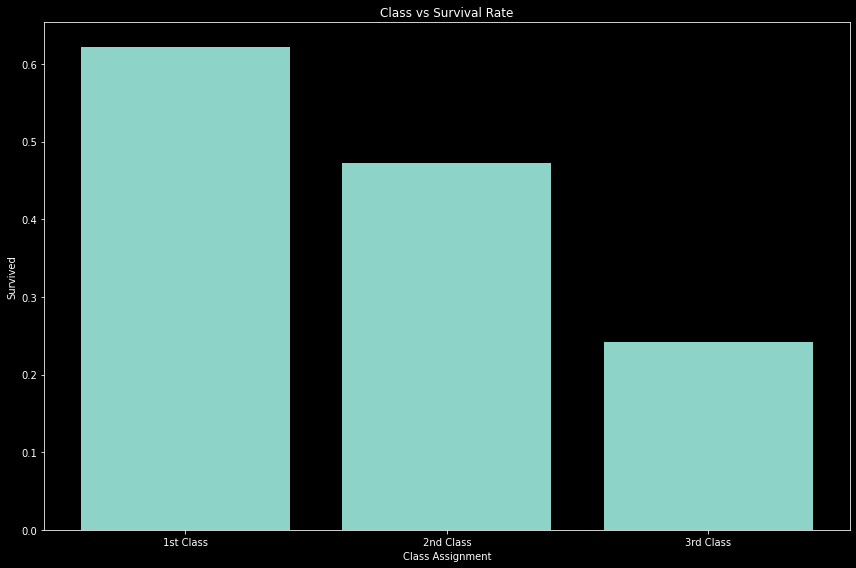

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.bar(x = ['1st Class', '2nd Class', '3rd Class'], height = train['Survived'].groupby(train['Pclass']).mean())
ax.set_title('Class vs Survival Rate')
ax.set_xlabel('Class Assignment')
ax.set_ylabel('Survived')
plt.tight_layout()
plt.show()

We should identify each person as a "Mr.", "Miss.", "Mrs." (their titles), to see if titles of varying social standing and gender association had differing survival rates

In [ ]:
## We will use str.extract and a regex expression to do this
### Regex is difficult to understand. Go pratice this!
train['titles'] = train['Name'].str.extract(r', (\w+\.)')
train.dropna(inplace=True)

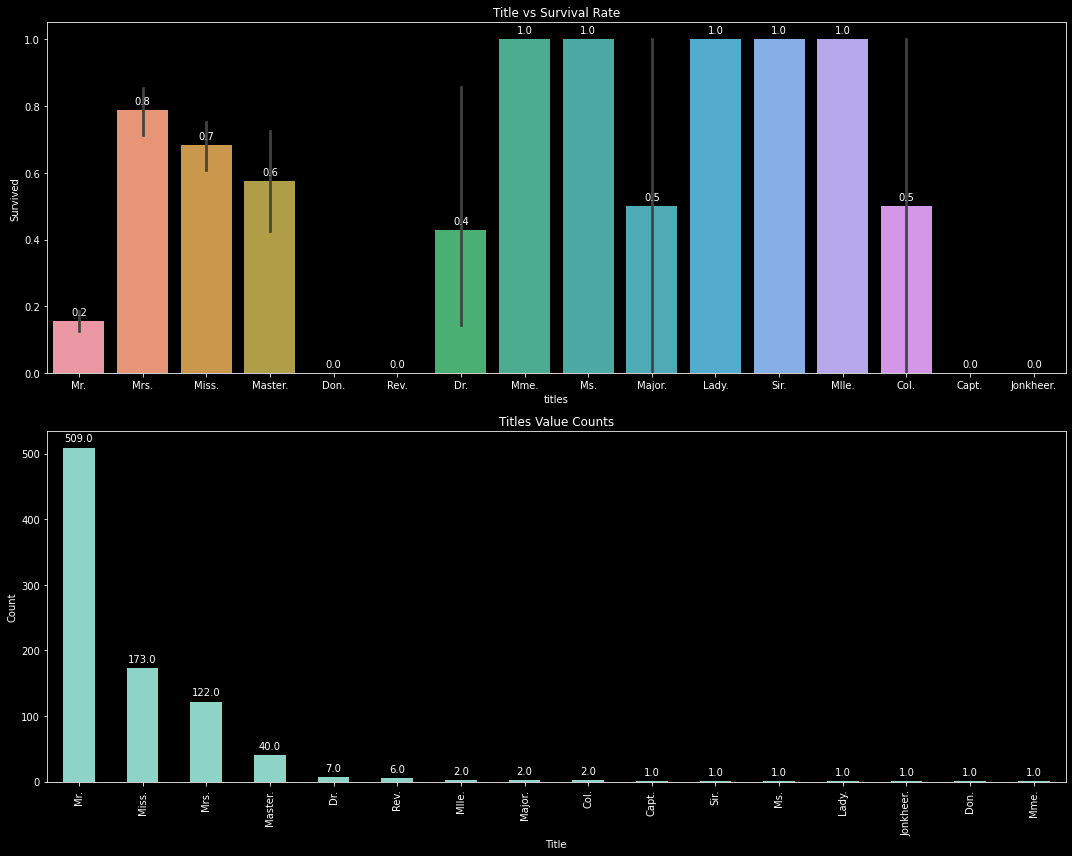

In [ ]:
fig, ax = plt.subplots(2, figsize=(15, 12))
f = sns.barplot(x='titles', y='Survived', ax=ax[0], data=train)
for p in f.patches:
    f.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
ax[0].set_title('Title vs Survival Rate')

h = train.titles.value_counts().plot(kind='bar', ax=ax[1])
for p in h.patches:
    h.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
ax[1].set_title('Titles Value Counts')
ax[1].set_xlabel('Title')
ax[1].set_ylabel('Count')
plt.tight_layout()
plt.show()

Those with titles of higher social standing and those that were attributed to the female sex had much higher chances of survival! However, these results are misleading, because out of the many hundreds of people on board the Titanic, less than 30 people held any title that was higher in social standing than that of "Mr", "Miss", "Mrs", or "Master". Therefore, we will classify all of the titles other than these listed as "Other"

Let's quickly deal with the Parent/Children (Parch) column by binning the values into 0,1,2,other

In [ ]:
train['Parch'].replace({5:'Other', 3:'Other', 4:'Other', 6:'Other'}, inplace=True)

Finally, let's identify the affect that familial bonds had on survival rate! Let's sort the Names in alphabetical order, which works because last names come first, and then identify the ticket these names had!

In [ ]:
train[['Name', 'Ticket']].sort_values(by='Name')

,Name,Ticket
PassengerId,,
846,"Abbing, Mr. Anthony",C.A. 5547
747,"Abbott, Mr. Rossmore Edward",C.A. 2673
280,"Abbott, Mrs. Stanton (Rosa Hunt)",C.A. 2673
309,"Abelson, Mr. Samuel",P/PP 3381
875,"Abelson, Mrs. Samuel (Hannah Wizosky)",P/PP 3381
...,...,...
287,"de Mulder, Mr. Theodore",345774
283,"de Pelsmaeker, Mr. Alfons",345778
362,"del Carlo, Mr. Sebastiano",SC/PARIS 2167


When it comes to ticket assignment, those who were in the same family had the same tickets!! Let's see exactly how many families were on board

In [ ]:
train['Ticket'][train['Ticket'].duplicated(keep=False)]

PassengerId
4          113803
8          349909
9          347742
10         237736
11        PP 9549
          ...    
877          7534
880         11767
881        230433
886        382652
889    W./C. 6607
Name: Ticket, Length: 325, dtype: object

There were a total of 326 people associated with a family in total. Let's classify each of these passengers as "With family" and all of the other passengers as "Without family"

In [ ]:
## Find duplicate tickets and associate the passengers with those duplicated tickets as having a family
train['Family Status'] = train['Ticket'].duplicated(keep=False)
train['Family Status'].replace({False:'Without Family', True:'With Family'}, inplace=True)

Let's model!

First, let's drop all of the unneeded columns

In [ ]:
## Create a new dataframe, df, our dataframe to be used for modeling
df = train.drop(columns=['PassengerId', 'Name', 'Age', 'Ticket', 'Fare'])

Let's numerically encoe all of the columns that need to be

In [ ]:
## Numerically encode columns

### Family Status column
df['Family Status'].replace({'Without Family':0, 'With Family':1}, inplace=True)

### titles column
df['titles'].replace({'Mr.':0, 'Mrs.':1, 'Miss.':2, 'Master.':3, 'Don.':4, 'Rev.':4, 'Dr.':4, 
                      'Mme.':4, 'Ms.':4, 'Major.':4, 'Lady.':4, 'Sir.':4, 'Mlle.':4, 'Col.':4, 
                      'Capt.':4, 'Jonkheer.':4}, inplace=True)

### binned_age column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['binned_age'] = le.fit_transform(df['binned_age'])

### binned_fare column
le2 = LabelEncoder()
df['binned_fare'] = le2.fit_transform(df['binned_fare'])

### Embarked column
le3 = LabelEncoder()
df['Embarked'] = le3.fit_transform(df['Embarked'])

Let's test our model on our current data now!

In [ ]:
from sklearn.model_selection import train_test_split
trains, tests = train_test_split(df, random_state=3)


from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
x_train = trains.drop(columns='Survived')
y_train = trains['Survived']
x_test = tests.drop(columns='Survived')
x_train['Parch'].replace({'Other':3}, inplace=True)
x_test['Parch'].replace({'Other':3}, inplace=True)
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, tests['Survived'])

0.7568807339449541

The logistic regression approach did not work so well. Let's use different classifiers.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Random Forest
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
y1 = rfc.predict(x_test)

from sklearn.metrics import accuracy_score
print('Random Forest: ', accuracy_score(y1, tests['Survived']))

# Gradient Boost
boost = GradientBoostingClassifier()
boost.fit(x_train, y_train)
y2 = boost.predict(x_test)

from sklearn.metrics import accuracy_score
print('Gradient Boost: ', accuracy_score(y2, tests['Survived']))

from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train, y_train)
y3 = xgb.predict(x_test)
print('XGBoost: ', accuracy_score(y3, tests['Survived']))

from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train, y_train)
y4 = svc.predict(x_test)
print('SVC: ', accuracy_score(y4, tests['Survived']))

Random Forest:  0.7844036697247706
Gradient Boost:  0.7844036697247706
XGBoost:  0.7981651376146789
SVC:  0.7798165137614679


In [ ]:
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import accuracy_score, make_scorer
# Define our search space for grid search
search_space = [
  {
    'n_estimators': [500, 1000, 10000],
    'learning_rate': [0.01, 0.001, 0.001, 0.2, 0.3],
    'max_depth': range(3, 6),
    'colsample_bytree': [i/10.0 for i in range(1, 4)],
    'gamma': [i/10.0 for i in range(5)],
    'k': [5, 7, 10],
  }
]
# Define cross validation
kfold = KFold(n_splits=10)

grid_search = GridSearchCV(estimator=xgb, param_grid=search_space, n_jobs=-1, cv=kfold, verbose=1)

grid_search.fit(x_train, y_train)

Fitting 10 folds for each of 2025 candidates, totalling 20250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   18.9s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed: 10.6min
[Parallel(n_jobs=-1)]: Done 1796 tasks      | elapsed: 15.4min
[Parallel(n_jobs=-1)]: Done 2446 tasks      | elapsed: 21.1min
[Parallel(n_jobs=-1)]: Done 3196 tasks      | elapsed: 27.6min
[Parallel(n_jobs=-1)]: Done 4046 tasks      | elapsed: 35.2min
[Parallel(n_jobs=-1)]: Done 4996 tasks      | elapsed: 43.4min
[Parallel(n_jobs=-1)]: Done 6046 tasks      | elapsed: 52.6min
[Parallel(n_jobs=-1)]: Done 7196 tasks      | elapsed: 62.7min
[Parallel(n_jobs=-1)]: Done 8446 tasks      | elapsed: 73.4min
[Parallel(n_jobs=-1)]: Done 9796 tasks      | elapsed: 85.3min
[Parallel(n_jobs=-1)]: Done 11246 tasks      |

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic'...
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'colsample_bytree': [0.1, 0.2, 0.3],
                          'gamma': [0.0, 0.1, 0.2, 0.3, 0.4], 'k': [5, 7, 10],
                          'learning_rate': [0.01, 0

In [ ]:
grid_search.best_score_, grid_search.best_estimator_, grid_search.best_params_

(0.8467599067599068,
 XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=0.3, gamma=0.2, k=5,
               learning_rate=0.2, max_delta_step=0, max_depth=4,
               min_child_weight=1, missing=None, n_estimators=1000, n_jobs=1,
               nthread=None, objective='binary:logistic', random_state=0,
               reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
               silent=None, subsample=1, verbosity=1),
 {'colsample_bytree': 0.3,
  'gamma': 0.2,
  'k': 5,
  'learning_rate': 0.2,
  'max_depth': 4,
  'n_estimators': 1000})

In [ ]:
xgb2 = grid_search.best_estimator_
xgb2.fit(x_train, y_train)
y5 = xgb2.predict(x_test)
print('XGBoost: ', accuracy_score(y5, tests['Survived']))

XGBoost:  0.7889908256880734


We have to do all the same preprocessing on the test data for making predictions for the competition

In [ ]:
test = pd.read_csv('test.csv')

## Let's make the passenger IDs the index of the data
test.index = test['PassengerId']

## Drop the Cabin column because there are so many missing values
test = test.drop(columns=['Cabin'])

## Impute missing age values with the median
test['Age'].fillna(test['Age'].median(), inplace=True)

## Impute missing embarked values with the mode
test['Embarked'].fillna(test['Embarked'].mode()[0], inplace=True)

## Bin the ages
test['binned_age'] = pd.qcut(test['Age'], q=6)

# Numerically encode sex column
test['Sex'].replace({'male':0, 'female':1}, inplace=True)

# Numerically encode Sibling/Spouse column
test['SibSp'].replace({4:3, 5:3, 8:3}, inplace=True)

# Outliers
from scipy import stats
## Copy dataframe
out = test.copy()
## Calculate z-scores and place in dataframe column
out['z'] = np.abs(stats.zscore(test['Fare']))
out = out['z']
## Drop the index values that contain z-scores greater than 3
test.drop(out[out>3].index.values, axis=0, inplace=True)

# Bin the fares
test['binned_fare'] = pd.qcut(x=test['Fare'], q=6)

# Identify titles and drop any random missing values
test['titles'] = test['Name'].str.extract(r', (\w+\.)')
test.dropna(inplace=True)

# Numerically encode Parch column
test['Parch'].replace({5:'Other', 3:'Other', 4:'Other', 6:'Other'}, inplace=True)

## Find duplicate tickets and associate the passengers with those duplicated tickets as having a family
test['Family Status'] = test['Ticket'].duplicated(keep=False)
test['Family Status'].replace({False:'Without Family', True:'With Family'}, inplace=True)

## Create a new dataframe, df, our dataframe to be used for modeling
df2 = test.drop(columns=['PassengerId', 'Name', 'Age', 'Ticket', 'Fare'])

## Numerically encode columns

### Family Status column
df2['Family Status'].replace({'Without Family':0, 'With Family':1}, inplace=True)

### titles column
df2['titles'].replace({'Mr.':0, 'Mrs.':1, 'Miss.':2, 'Master.':3, 'Don.':4, 'Rev.':4, 'Dr.':4, 
                      'Mme.':4, 'Ms.':4, 'Major.':4, 'Lady.':4, 'Sir.':4, 'Mlle.':4, 'Col.':4, 
                      'Capt.':4, 'Jonkheer.':4}, inplace=True)

### binned_age column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df2['binned_age'] = le.fit_transform(df2['binned_age'])

### binned_fare column
le2 = LabelEncoder()
df2['binned_fare'] = le2.fit_transform(df2['binned_fare'])

### Embarked column
le3 = LabelEncoder()
df2['Embarked'] = le3.fit_transform(df2['Embarked'])

In [ ]:
# df2.drop(1306, axis=0, inplace=True)
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
x_train = df.drop(columns='Survived')
y_train = df['Survived']
x_test = df2
x_train['Parch'].replace({'Other':3}, inplace=True)
x_test['Parch'].replace({'Other':3}, inplace=True)
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

ValueError: ignored

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, )

In [ ]:
test2 = pd.read_csv('test.csv')
test2